(13, 12) (13, 12) (13, 12) (13, 12)


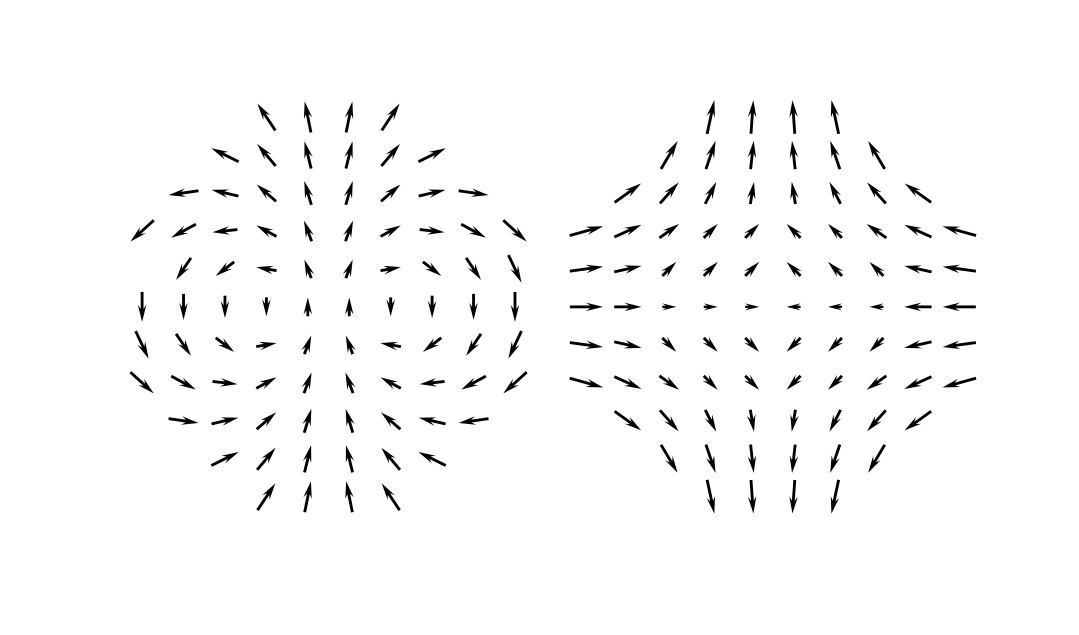

In [242]:
%matplotlib inline
import matplotlib 
from numpy import *
from pylab import *
 
# use LaTeX, choose nice some looking fonts and tweak some settings
matplotlib.rc('font', family='serif')
matplotlib.rc('font', size=16)
matplotlib.rc('legend', fontsize=16)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('legend', handlelength=1.5)
matplotlib.rc('legend', frameon=False)
matplotlib.rc('xtick.major', pad=7)
matplotlib.rc('xtick.minor', pad=7)
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', 
              preamble=[r'\usepackage[T1]{fontenc}',
                        r'\usepackage{amsmath}',
                        r'\usepackage{txfonts}',
                        r'\usepackage{textcomp}'])
 
close('all')
figure(figsize=(16, 9.5))
 
# generate grid
x=linspace(-4, 4, 12)
y=linspace(-4, 4, 13)
x, y=meshgrid(x, y)
 

def E1(q, a, x, y):
    r1 = sqrt((x-a[0])*(x-a[0])+ (y-a[1])*(y-a[1]))*2+15.0
    r2 = sqrt((x+a[0])*(x+a[0])+ (y+a[1])*(y+a[1]))*2+15.0  
    theta1 = arctan2(y-a[1],x-a[0])
    theta2 = arctan2(y+a[1],x+a[0])
    return 2.0*r1*r2*(sin(theta1+theta2)), -2.0*r1*r2*(cos(theta1+theta2))
                        

def E2(q, a, x, y):
    r1 = sqrt(sqrt((x-a[0])*(x-a[0])+ (y-a[1])*(y-a[1]))*2+250.0)+15.0
    r2 = sqrt(sqrt((x-a[0])*(x-a[0])+ (y+a[1])*(y+a[1]))*2+250.0)+15.0 
    r3 = sqrt(sqrt((x+a[0])*(x+a[0])+ (y-a[1])*(y-a[1]))*2+250.0)+15.0
    r4 = sqrt(sqrt((x+a[0])*(x+a[0])+ (y+a[1])*(y+a[1]))*2+250.0)+15.0  
    theta1 = arctan2(y-a[1],x-a[0])
    theta2 = arctan2(y+a[1],x-a[0])
    theta3 = arctan2(y-a[1],x+a[0])
    theta4 = arctan2(y+a[1],x+a[0])
    return 2.0*sqrt(r1*r2*r3*r4)*(sin(theta1)-sin(theta2)-sin(theta3)+sin(theta4)), \
        -2.0*sqrt(r1*r2*r3*r4)*(cos(theta1)-cos(theta2)-cos(theta3)+cos(theta4))

    
    
    
def E11(q, a, x, y):
    return q*(y-a[0])/((x-a[0])**2+(y-a[1])**2+0.1)**(1.5), \
        q*(x-a[1])/((x-a[0])**2+(y-a[1])**2+0.1)**(1.5)

def E12(q, a, x, y):
    return q*(x+a[0])/((x+a[0])**2+(y+a[1])**2+0.1)**(1.5), \
        q*(y+a[1])/((x+a[0])**2+(y+a[1])**2+0.1)**(1.5)

# calculate vector field
Ex1, Ey1=E1(1, [1.0, 0.0], x, y) 

print(Ex1.shape, Ey1.shape, Ex2.shape, Ey2.shape)
#Ex=Ex1+Ex2
#Ey=Ey1+Ey2
# remove vector with length larger than E_max
E1_max=1000
E1_min = 400
E1=sqrt(Ex1**2+Ey1**2)
k=find(E1.flat[:]>E1_max)
Ex1.flat[k]=nan
Ey1.flat[k]=nan
k2 = find(r1.flat[:]< 16)
Ex1.flat[k2]=nan
Ey1.flat[k2]=nan
k3 = find(r2.flat[:]< 16)
Ex1.flat[k3]=nan
Ey1.flat[k3]=nan

Ex2, Ey2=E2(1, [4.2, 4.2], x, y)
E2_max=20000
E2_min = 400
E2=sqrt(Ex2**2+Ey2**2)
k=find(E2.flat[:]>E2_max)
Ex2.flat[k]=nan
Ey2.flat[k]=nan
rr = sqrt(x**2+y**2)
k2 = find(rr.flat[:]> 3.6)
Ex2.flat[k2]=nan
Ey2.flat[k2]=nan
k3 = find(rr.flat[:]< 2)
Ex2.flat[k3]=sign(Ex2.flat[k3])*800
Ey2.flat[k3]=sign(Ey2.flat[k3])*800
# k3 = find(r2.flat[:]< 12)
# Ex2.flat[k3]=nan
# Ey2.flat[k3]=nan
# plot vecor field

axes1=subplot(1,2,1)
quiver(x, y, Ex1, Ey1, pivot='middle', headwidth=3, headlength=6)
# xlabel('$x$')
# ylabel('$y$')
axis('image')
xlim(-5.2, 5.2)
ylim(-5.2, 5.2)
fig = gcf()
axis('off')
subplot(1,2,2)
quiver(x, y, Ex2, Ey2, pivot='middle', headwidth=3, headlength=6)
# xlabel('$x$')
# ylabel('$y$')
axis('image')
xlim(-5.2, 5.2)
ylim(-5.2, 5.2)
axis('off')
subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=-0.25, hspace=-0.4)

savefig('spivak_fig_4_2.pdf',bbox_inches='tight')
show()

In [71]:
max(0.0001, 2.)

2.0

In [213]:
sign(-1)

-1